In [175]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import numpy
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import RandomForestClassifier
from numpy import loadtxt



We loaded the balanced train data using SMOTE 

In [176]:
X_train_SMOTE = loadtxt('X_train_SMOTE.csv', delimiter=',')
y_train_SMOTE = loadtxt('y_train_SMOTE.csv', delimiter=',')
y_pred_SMOTE = loadtxt('y_pred_SMOTE.csv', delimiter=',')
y_test = loadtxt('y_test.csv', delimiter=',')
X_test = pd.read_csv('X_test.csv', index_col = 0)
#df_X_train = pd.read_csv('df_X_train', index_col = 0) 
%store -r df_X_train 

In [177]:
df_X_train

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
0,100.000000,98.500000,37.500000,110.000000,70.000000,51.000000,18.000000,61.0,1.0,0.000000,1.000000,-141.650000,35.0
1,101.000000,99.000000,36.100000,146.000000,121.000000,104.000000,20.000000,30.0,0.0,1.000000,0.000000,-7.810000,8.0
2,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,66.0,1.0,98.000000,98.000000,-2.940000,16.0
3,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,69.0,1.0,98.000000,98.000000,-2.890000,45.0
4,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,100.0,1.0,1.000000,0.000000,-180.740000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55149,89.216935,97.874193,37.048331,107.342742,73.845968,59.223389,16.108467,64.0,0.0,98.000000,98.000000,-0.971928,18.0
55150,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,75.0,1.0,0.126677,0.873323,-110.244767,1.0
55151,96.908068,96.266818,98.000000,128.275795,65.766818,45.150227,21.000000,31.0,1.0,98.000000,98.000000,-0.020000,10.0
55152,92.967422,99.266804,36.600000,113.382887,74.183299,59.000000,14.000000,68.0,1.0,1.000000,0.000000,-6.760000,35.0


In [178]:
# sensitive features are deleted

X_train_NSF = df_X_train.drop(['Age', 'Gender'],axis=1)
X_train_NSF

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Unit1,Unit2,HospAdmTime,ICULOS
0,100.000000,98.500000,37.500000,110.000000,70.000000,51.000000,18.000000,0.000000,1.000000,-141.650000,35.0
1,101.000000,99.000000,36.100000,146.000000,121.000000,104.000000,20.000000,1.000000,0.000000,-7.810000,8.0
2,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,-2.940000,16.0
3,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,-2.890000,45.0
4,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,1.000000,0.000000,-180.740000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
55149,89.216935,97.874193,37.048331,107.342742,73.845968,59.223389,16.108467,98.000000,98.000000,-0.971928,18.0
55150,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,0.126677,0.873323,-110.244767,1.0
55151,96.908068,96.266818,98.000000,128.275795,65.766818,45.150227,21.000000,98.000000,98.000000,-0.020000,10.0
55152,92.967422,99.266804,36.600000,113.382887,74.183299,59.000000,14.000000,1.000000,0.000000,-6.760000,35.0


In [179]:
X_test_all= X_test.drop(['Gender','Age','AgeGroup'],axis=1)
X_test_all

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Unit1,Unit2,HospAdmTime,ICULOS
5489,98.0,98.0,98.00,98.0,98.00,98.0,98.0,98.0,98.0,-4.80,19
2500,122.0,98.0,39.28,135.0,93.67,98.0,32.0,1.0,0.0,-0.02,24
30561,68.0,96.0,98.00,160.0,90.00,62.0,15.0,98.0,98.0,0.00,21
1925,91.0,98.5,36.90,101.5,72.50,48.5,14.0,0.0,1.0,-93.26,41
32849,98.0,98.0,98.00,98.0,98.00,98.0,98.0,1.0,0.0,-6.05,31
...,...,...,...,...,...,...,...,...,...,...,...
26145,127.0,94.5,38.70,86.0,70.00,60.0,5.0,0.0,1.0,-74.53,43
7717,97.0,94.0,98.00,147.0,98.00,72.0,21.0,98.0,98.0,-0.05,22
34119,76.0,100.0,36.50,88.0,80.00,77.0,17.0,98.0,98.0,-0.02,27
3206,77.0,100.0,98.00,169.0,110.33,98.0,14.0,1.0,0.0,-8.63,5


In [180]:
#functions to generate accuracy report
def evaluation_score (y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred) 
    print("Confusion Matrix \n", cm)
    print("Classification Report \n", classification_report(y_test,y_pred))

In [181]:
def specificity_score (y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    TN, FP, FN, TP = cm.ravel()
    specificity = TN / (TN+FP)
    return specificity

In [182]:
def Plotting(Plots_title, Acc, Pre, Sens, Spec):
    
    plot = plt.figure()
    axes = plot.add_axes([0,0,1,1])
    metrics = ['Accuracy',  'Precision', 'Sensitivity','Specificty']
    values = [Acc, Pre, Sens, Spec]
    barlist = axes.bar(metrics,values, width=0.5)
    barlist[0].set_color('royalblue')
    barlist[1].set_color('green')
    barlist[2].set_color('orange')
    barlist[3].set_color('yellow')
    axes.set_yticks(np.arange(0, 1.25, 0.5))
    axes.set_title(Plots_title)
    def autolabel(rects):
        for idx,rect in enumerate(barlist):
            height = rect.get_height()
            axes.text(rect.get_x() + rect.get_width()/2., 1*height,
                    round(values[idx],3),
                    ha='center', va='bottom', rotation=0)

    autolabel(barlist)
    plt.show()



In [183]:
import joblib
# load
rf_model_SMOTE = joblib.load("my_random_forest.joblib")

In [184]:
#Metrics packages
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score 
import warnings
from sklearn.metrics import precision_score, recall_score, make_scorer, accuracy_score

In [185]:
Counter(y_test)

Counter({0.0: 11829, 1.0: 175})

Confusion Matrix 
 [[11757    72]
 [   97    78]]
Classification Report 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     11829
         1.0       0.52      0.45      0.48       175

    accuracy                           0.99     12004
   macro avg       0.76      0.72      0.74     12004
weighted avg       0.98      0.99      0.99     12004



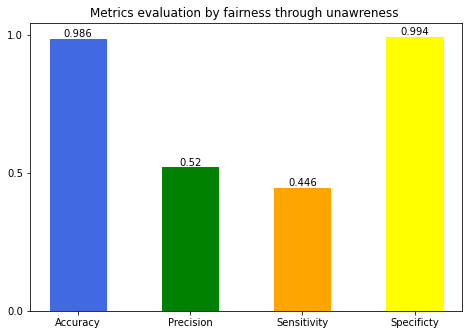

In [186]:

rf_model_SMOTE = rf_model_SMOTE.fit(X_train_NSF,y_train_SMOTE)
y_pred_SMOTE = rf_model_SMOTE.predict(X_test_all)
evaluation_score(y_test,y_pred_SMOTE)

#cm_SMOTE=confusion_matrix(y_test,y_pred_SMOTE)
#TN, FP, FN, TP = cm_SMOTE.ravel()
#pd.crosstab(y_test, y_pred_SMOTE, rownames = ['Actual'], colnames =['Predicted'], margins = True)
Plotting("Metrics evaluation by fairness through unawreness ", accuracy_score(y_test,y_pred_SMOTE),precision_score(y_test,y_pred_SMOTE),recall_score(y_test,y_pred_SMOTE),specificity_score(y_test,y_pred_SMOTE)) 
#plt.savefig('rf_model_with_SMOTE_Trainedwithmale.png')

In [187]:
sensitive_features = X_test[['Age','Gender']] 
sensitive_features

,Age,Gender
5489,46,0
2500,36,1
30561,53,1
1925,62,1
32849,50,0
...,...,...
26145,58,1
7717,60,0
34119,60,0
3206,61,0


In [188]:
sensitive_features = X_test[['Age','Gender']] 

#Define target variable 
sensitive_features['y_true'] =  y_test
#Define the predicted values
sensitive_features['y_pred'] = y_pred_SMOTE

<ipython-input-188-0db74ff03866>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensitive_features['y_true'] =  y_test
<ipython-input-188-0db74ff03866>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensitive_features['y_pred'] = y_pred_SMOTE


In [189]:
def fairness_metrics(sensitive_features):
    """Calculate fairness for subgroup of population"""
    
    #Confusion Matrix
    cm=confusion_matrix(sensitive_features['y_true'],sensitive_features['y_pred'])
    TN, FP, FN, TP = cm.ravel()
    
    N = TP+FP+FN+TN #Total population
    ACC = (TP+TN)/N #Accuracy
    PPV = TP/(TP+FP) #Positive predictive value (Precison)
    TPR = TP/(TP+FN) # True positive rate
    TNR = TN/(FP+TN) # True negative rate
    return np.array([ACC, PPV, TPR, TNR])  

In [190]:
fm_Gender_1 = fairness_metrics(sensitive_features[sensitive_features.Gender==1])
fm_Gender_0 = fairness_metrics(sensitive_features[sensitive_features.Gender==0])

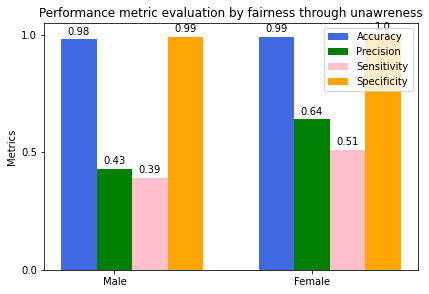

In [196]:
import matplotlib.pyplot as plt
fig, axe = plt.subplots()
index = np.arange(2)  
width = 0.18   # the width of the bars
axe.set_yticks(np.arange(0, 1.25, 0.5))
Accuracy = [round(fm_Gender_1[0],2),round(fm_Gender_0[0],2)]
plts1 = plt.bar(index + 0.00, Accuracy, width, color='royalblue', label = 'Accuracy')
Precision = [round(fm_Gender_1[1],2),round(fm_Gender_0[1],2)]
plts2 = plt.bar(index + width, Precision, width, color='green', label= 'Precision')
Sensitivity = [round(fm_Gender_1[2],2),round(fm_Gender_0[2],2)]
plts3 = plt.bar(index +width*2, Sensitivity, width, color='pink', label = 'Sensitivity')
Specificity= [round(fm_Gender_1[3],2),round(fm_Gender_0[3],2)]
plts4 = plt.bar(index +width*3, Specificity, width, color='orange', label = 'Specificity')

axe.set_ylabel('Metrics')
axe.set_xticks(index+width)
axe.set_xticklabels( ('Male', 'Female'))
plt.legend()  

def autolabel(plts):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in plts:
        height = rect.get_height()
        axe.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
      
   
 
autolabel(plts1)
autolabel(plts2)
autolabel(plts3)
autolabel(plts4)
fig.tight_layout()
plt.title('Performance metric evaluation by fairness through unawreness') 
plt.show()

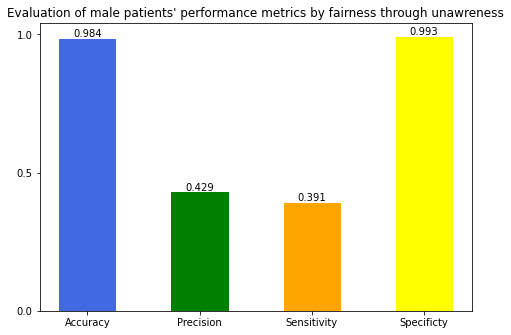

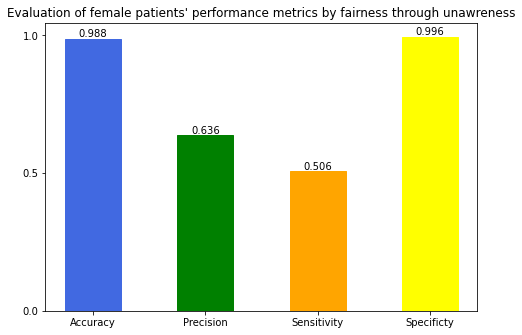

In [197]:
Plotting("Evaluation of male patients' performance metrics by fairness through unawreness", fm_Gender_1[0],fm_Gender_1[1],fm_Gender_1[2],fm_Gender_1[3])
Plotting("Evaluation of female patients' performance metrics by fairness through unawreness",fm_Gender_0[0],fm_Gender_0[1],fm_Gender_0[2],fm_Gender_0[3])


In [198]:
import numpy as np
bins= [15, 40, 65, np.inf]
# (15,40] (40,65] and 60+ 
labels = ['Young','Adult','OLD']
X_test['AgeGroup'] = pd.cut(X_test['Age'], bins=bins, labels=labels)




In [199]:
sensitive_features = X_test[['Age','Gender','AgeGroup']]

In [200]:
sensitive_features['y_true'] =  y_test
sensitive_features['y_pred'] = y_pred_SMOTE

<ipython-input-200-277ca21f020f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensitive_features['y_true'] =  y_test
<ipython-input-200-277ca21f020f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensitive_features['y_pred'] = y_pred_SMOTE


In [201]:
Young = fairness_metrics(sensitive_features[sensitive_features.AgeGroup=='Young'])
Adult = fairness_metrics(sensitive_features[sensitive_features.AgeGroup=='Adult'])
OLD = fairness_metrics(sensitive_features[sensitive_features.AgeGroup=='OLD'])

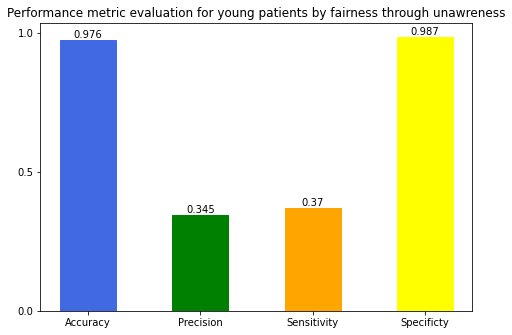

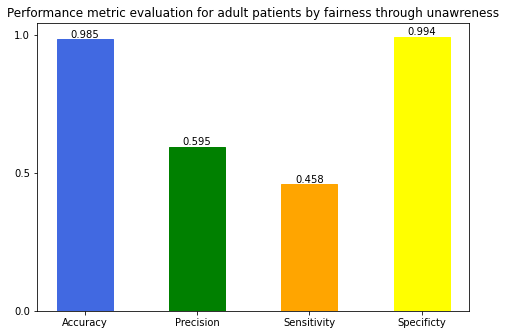

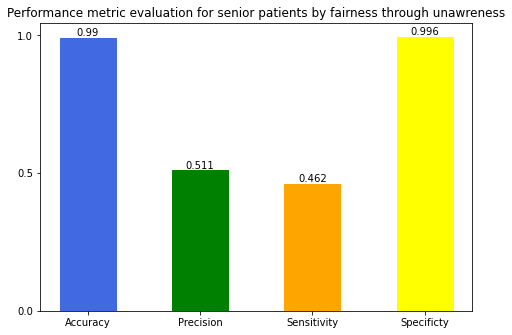

In [202]:
Plotting("Performance metric evaluation for young patients by fairness through unawreness",Young[0],Young[1],Young[2],Young[3])
Plotting("Performance metric evaluation for adult patients by fairness through unawreness",Adult[0],Adult[1],Adult[2],Adult[3])
Plotting("Performance metric evaluation for senior patients by fairness through unawreness",OLD[0],OLD[1],OLD[2],OLD[3])

In [203]:
pd.crosstab(sensitive_features.AgeGroup, sensitive_features['Gender'])
sensitive_features["Young_Male"] = np.where((sensitive_features.AgeGroup=='Young') &
                                   (sensitive_features.Gender==1),1,0)
sensitive_features["Adult_Male"] = np.where((sensitive_features.AgeGroup=='Adult') &
                                   (sensitive_features.Gender==1),1,0)
sensitive_features["Old_Male"] = np.where((sensitive_features.AgeGroup=='OLD') &
                                   (sensitive_features.Gender==1),1,0)
sensitive_features["Young_Female"] = np.where((sensitive_features.AgeGroup=='Young') &
                                   (sensitive_features.Gender==0),1,0)
sensitive_features["Adult_Female"] = np.where((sensitive_features.AgeGroup=='Adult') &
                                   (sensitive_features.Gender==0),1,0)
sensitive_features["Old_Female"] = np.where((sensitive_features.AgeGroup=='OLD') &
                                   (sensitive_features.Gender==0),1,0)
Young_Male = fairness_metrics(sensitive_features[sensitive_features.Young_Male==1])
Adult_Male = fairness_metrics(sensitive_features[sensitive_features.Adult_Male==1])
Old_Male = fairness_metrics(sensitive_features[sensitive_features.Old_Male ==1])
Young_Female = fairness_metrics(sensitive_features[sensitive_features.Young_Female ==1])
Adult_Female = fairness_metrics(sensitive_features[sensitive_features.Adult_Female ==1])
Old_Female = fairness_metrics(sensitive_features[sensitive_features.Old_Female ==1])

<ipython-input-203-1a3aa2cf9e8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensitive_features["Young_Male"] = np.where((sensitive_features.AgeGroup=='Young') &
<ipython-input-203-1a3aa2cf9e8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensitive_features["Adult_Male"] = np.where((sensitive_features.AgeGroup=='Adult') &
<ipython-input-203-1a3aa2cf9e8b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [204]:
def evaluation_metrics(sensitive_features):
    
    #Confusion Matrix
    cm=confusion_matrix(sensitive_features['y_true'],sensitive_features['y_pred'])
    print(cm)
    TN, FP, FN, TP = cm.ravel() 
    
    N = TP+FP+FN+TN #Total population
    ACC = (TP+TN)/N #Accuracy
    PPV = TP/(TP+FP) #Positive predictive value (Precison)
    TPR = TP/(TP+FN) # True positive rate
    FPR = FP/(FP+TN) # False positive rate
    TNR = TN/(FP + TN) # True negative rate
    FNR = FN /(FN +TP) # False negative rate
    FDR = 1 - PPV # False discovery rate
    df_metrics = [{'Acc': (TP+TN)/N, 'PPV': TP/(TP+FP), 'TPR' : TP/(TP+FN), 'FPR' : FP/(FP+TN), 'TNR' : TN/(FP + TN), 'FNR' : FN /(FN +TP), 'FDR' : 1 - PPV  }]
  
    return df_metrics

In [205]:
Male = evaluation_metrics(sensitive_features[sensitive_features.Gender==1])
Female= evaluation_metrics(sensitive_features[sensitive_features.Gender==0])
data_metrics_Male = pd.DataFrame(Male, index= ['Men'])
data_metrics_Female = pd.DataFrame(Female, index= ['Women'])

[[6412   48]
 [  56   36]]
[[5345   24]
 [  41   42]]


In [169]:
pd.concat([data_metrics_Male, data_metrics_Female])

,Acc,PPV,TPR,FPR,TNR,FNR,FDR
Men,0.984890,0.454545,0.380435,0.006502,0.993498,0.619565,0.545455
Women,0.988261,0.641791,0.518072,0.004470,0.995530,0.481928,0.358209


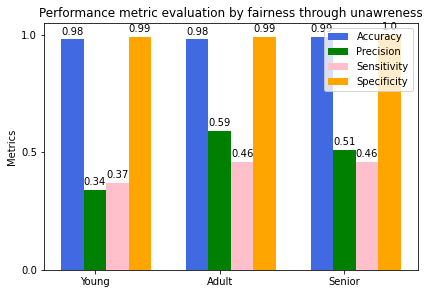

In [206]:
import matplotlib.pyplot as plt
fig, axe = plt.subplots()
index = np.arange(3)  
width = 0.18   # the width of the bars
axe.set_yticks(np.arange(0, 1.25, 0.5))
Accuracy = [round(Young[0],2),round(Adult[0],2), round(OLD[0],2)]
plts1 = plt.bar(index + 0.00, Accuracy, width, color='royalblue', label = 'Accuracy')
Precision = [round(Young[1],2),round(Adult[1],2), round(OLD[1],2)]
plts2 = plt.bar(index + width, Precision, width, color='green', label= 'Precision')
Sensitivity = [round(Young[2],2), round(Adult[2],2), round(OLD[2],2)]
plts3 = plt.bar(index +width*2, Sensitivity, width, color='pink', label = 'Sensitivity')
Specificity= [round(Young[3],2),round(Adult[3],2), round(OLD[3],2)]
plts4 = plt.bar(index +width*3, Specificity, width, color='orange', label = 'Specificity')

axe.set_ylabel('Metrics')
axe.set_xticks(index+width)
axe.set_xticklabels( ('Young', 'Adult', 'Senior'))
plt.legend()  

def autolabel(plts):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in plts:
        height = rect.get_height()
        axe.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
      
   
 
autolabel(plts1)
autolabel(plts2)
autolabel(plts3)
autolabel(plts4)
fig.tight_layout()
plt.title('Performance metric evaluation by fairness through unawreness') 
plt.show()

In [207]:
Youngs = evaluation_metrics(sensitive_features[sensitive_features.AgeGroup=='Young'])
Adults = evaluation_metrics(sensitive_features[sensitive_features.AgeGroup=='Adult'])
OLDs = evaluation_metrics(sensitive_features[sensitive_features.AgeGroup=='OLD'])
data_metrics_Youngs = pd.DataFrame(Youngs, index= ['Youngs'])
data_metrics_Adults = pd.DataFrame(Adults, index= ['Adults'])
data_metrics_Olds = pd.DataFrame(OLDs, index= ['Seniors'])

[[1475   19]
 [  17   10]]
[[5186   30]
 [  52   44]]
[[5096   23]
 [  28   24]]


In [208]:
pd.concat([data_metrics_Youngs, data_metrics_Adults, data_metrics_Olds])

,Acc,PPV,TPR,FPR,TNR,FNR,FDR
Youngs,0.976331,0.344828,0.370370,0.012718,0.987282,0.629630,0.655172
Adults,0.984563,0.594595,0.458333,0.005752,0.994248,0.541667,0.405405
Seniors,0.990137,0.510638,0.461538,0.004493,0.995507,0.538462,0.489362


In [209]:
pd.concat([data_metrics_Male, data_metrics_Female, data_metrics_Youngs, data_metrics_Adults, data_metrics_Olds])

,Acc,PPV,TPR,FPR,TNR,FNR,FDR
Men,0.984127,0.428571,0.391304,0.007430,0.992570,0.608696,0.571429
Women,0.988078,0.636364,0.506024,0.004470,0.995530,0.493976,0.363636
Youngs,0.976331,0.344828,0.370370,0.012718,0.987282,0.629630,0.655172
Adults,0.984563,0.594595,0.458333,0.005752,0.994248,0.541667,0.405405
Seniors,0.990137,0.510638,0.461538,0.004493,0.995507,0.538462,0.489362


In [210]:
Young_Males = evaluation_metrics(sensitive_features[sensitive_features.Young_Male==1])
Adult_Males = evaluation_metrics(sensitive_features[sensitive_features.Adult_Male==1])
Old_Males = evaluation_metrics(sensitive_features[sensitive_features.Old_Male ==1])
Young_Females = evaluation_metrics(sensitive_features[sensitive_features.Young_Female ==1])
Adult_Females = evaluation_metrics(sensitive_features[sensitive_features.Adult_Female ==1])
Old_Females = evaluation_metrics(sensitive_features[sensitive_features.Old_Female ==1])

[[650  13]
 [ 17   4]]
[[2947   16]
 [  26   19]]
[[2815   19]
 [  13   13]]
[[825   6]
 [  0   6]]
[[2239   14]
 [  26   25]]
[[2281    4]
 [  15   11]]


In [211]:
dm_Young_Males = pd.DataFrame(Young_Males, index= ['Young_men'])
dm_Adult_Males = pd.DataFrame(Adult_Males, index= ['Adult_men'])
dm_Old_Males = pd.DataFrame(Old_Males, index= ['Senior_men'])
dm_Young_Females = pd.DataFrame(Young_Females, index= ['Young_women'])
dm_Adult_Females = pd.DataFrame(Adult_Females, index= ['Adult_women'])
dm_Old_Females = pd.DataFrame(Old_Females, index= ['Senior_women'])
pd.concat([data_metrics_Male, data_metrics_Female, data_metrics_Youngs, data_metrics_Adults, data_metrics_Olds,dm_Young_Males,dm_Adult_Males, dm_Old_Males, dm_Young_Females, dm_Adult_Females, dm_Old_Females  ])

,Acc,PPV,TPR,FPR,TNR,FNR,FDR
Men,0.984127,0.428571,0.391304,0.007430,0.992570,0.608696,0.571429
Women,0.988078,0.636364,0.506024,0.004470,0.995530,0.493976,0.363636
Youngs,0.976331,0.344828,0.370370,0.012718,0.987282,0.629630,0.655172
Adults,0.984563,0.594595,0.458333,0.005752,0.994248,0.541667,0.405405
Seniors,0.990137,0.510638,0.461538,0.004493,0.995507,0.538462,0.489362
Young_men,0.956140,0.235294,0.190476,0.019608,0.980392,0.809524,0.764706
Adult_men,0.986037,0.542857,0.422222,0.005400,0.994600,0.577778,0.457143
Senior_men,0.988811,0.406250,0.500000,0.006704,0.993296,0.500000,0.593750
Young_women,0.992832,0.500000,1.000000,0.007220,0.992780,0.000000,0.500000
Adult_women,0.982639,0.641026,0.490196,0.006214,0.993786,0.509804,0.358974
